<a href="https://colab.research.google.com/github/Leehaon/Data-Analysis/blob/main/%ED%95%99%EC%97%85%EC%A4%91%EB%8B%A8%EC%A7%80%EC%97%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 72.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd

df = pd.read_excel('/content/학업중단률 및 사유 (2).xlsx', header=3)
df.columns = df.columns.str.strip()

# 필요한 열만 추출 (고등학교 관련 열들)
df = df[['시도', '학업중단률(%).2', '부적응 계.2', '가사.2', '질병.8', '기타.8']]
df.columns = ['시도', '고등학교 중단률', '부적응', '가정환경', '질병', '기타']

# 중단률 열에서 숫자가 아닌 행 제거
df = df[pd.to_numeric(df['고등학교 중단률'], errors='coerce').notnull()]

# 중단률 열을 float으로 변환
df['고등학교 중단률'] = df['고등학교 중단률'].astype(float)

# 고등학교 중단률 2% 이상 필터링
df_high = df.query('`고등학교 중단률` >= 2.0')

# 정렬 및 고위험 플래그
df_high = df_high.sort_values(by='고등학교 중단률', ascending=False)
df_high = df_high.assign(고위험지역 = df_high['고등학교 중단률'] >= 2.0)

df_high.head()

import pandas as pd
import folium
from branca.colormap import linear

# 시도별 위도와 경도 정보 (경남, 경북, 전남, 전북 제외)
시도_coords = {
    '서울': [37.5665, 126.9780],
    '부산': [35.1796, 129.0756],
    '대구': [35.8723, 128.6025],
    '인천': [37.4563, 126.7052],
    '광주': [35.1595, 126.8514],
    '대전': [36.3504, 127.3845],
    '울산': [35.5397, 129.3114],
    '경기': [37.4138, 127.5183],
    '강원': [37.8228, 128.1555],
    '제주': [33.4996, 126.5312]
}

# 지도 생성 (중앙 위치는 대한민국)
m = folium.Map(location=[36.5, 127.5], zoom_start=7)

# 경남, 경북, 전남, 전북을 제외한 데이터 필터링
df_high_filtered = df_high[~df_high['시도'].isin(['경남', '경북', '전남', '전북', '충남', '충북', '전국', '대전'])]

# 중단률에 따른 원 크기 범위 설정
min_radius = df_high_filtered['고등학교 중단률'].min() * 10  # 최소 원 크기
max_radius = df_high_filtered['고등학교 중단률'].max() * 10  # 최대 원 크기

# 각 시도에 대해 중단률을 표시
for index, row in df_high_filtered.iterrows():
    시도 = row['시도']
    중단률 = row['고등학교 중단률']

    # 시도별 위도, 경도 정보
    lat, lon = 시도_coords.get(시도, [36.5, 127.5])

    # 중단률에 따라 원의 크기 설정 (중단률에 비례하게 반지름 설정)
    radius = (중단률 - df_high_filtered['고등학교 중단률'].min()) / (df_high_filtered['고등학교 중단률'].max() - df_high_filtered['고등학교 중단률'].min()) * (max_radius - min_radius) + min_radius

    # 원을 지도에 추가
    folium.CircleMarker(
        location=[lat, lon],
        radius=radius,  # 반지름
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f'{시도} 중단률: {중단률:.2f}%',  # 팝업 내용
    ).add_to(m)

# 지도 저장
m.save('school_dropout_map_without_gyungnam_gyungbuk_jeonnam_jeonbuk.html')

# 지도 시각화 결과 확인을 위해 HTML 파일을 출력
m

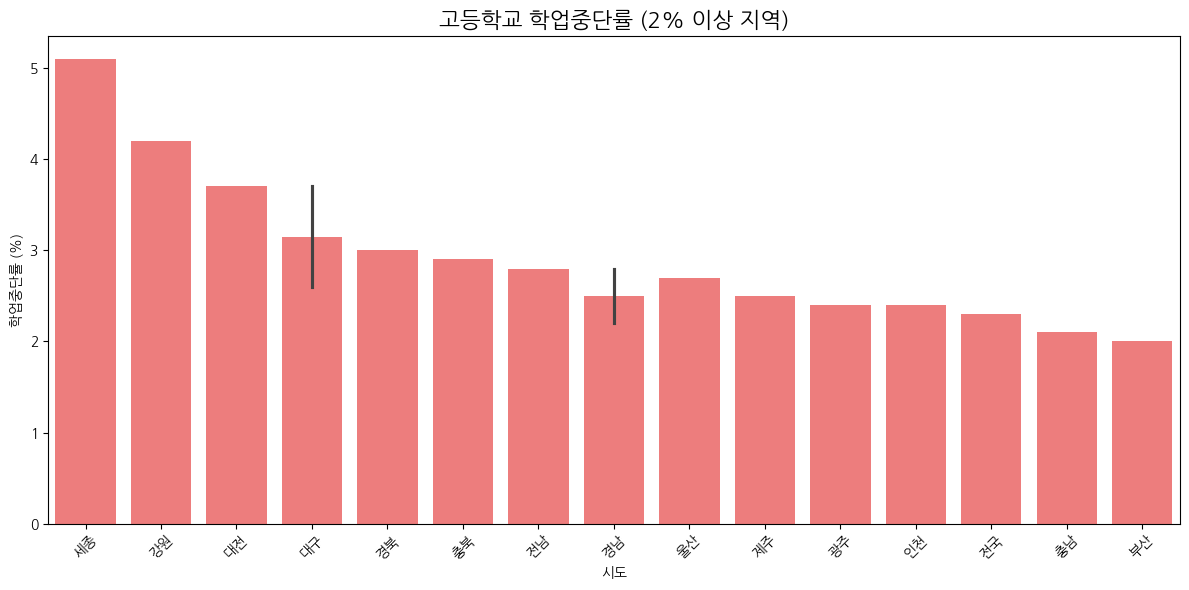

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 한글 폰트 설정 (구글 코랩 기준)
plt.rc('font', family='NanumGothic')  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 색상 통일: 'Reds_r' 대신 특정 색상 코드 사용
sns.barplot(data=df_high, x='시도', y='고등학교 중단률', color='#FF6B6B')  # 색상 지정

# 제목 및 라벨 추가
plt.title('고등학교 학업중단률 (2% 이상 지역)', fontsize=16)
plt.ylabel('학업중단률 (%)')
plt.xlabel('시도')

# X축 라벨 회전
plt.xticks(rotation=45)

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()
